# 6.4 Task

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Create Path

path=r'C:\Users\Nico\Desktop\Curso Data Analytics\Module 6\World Happiness report'

In [3]:
#Load happy_df_2023 dataset and create a dataframe called 'happy_df_2023'

happy_df_2023 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'happy_df_2023.csv'))

In [4]:
happy_df_2023.columns

Index(['Unnamed: 0', 'country', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'rank'],
      dtype='object')

## data cleaning

In [5]:
# Eliminate extra column

happy_df_2023 = happy_df_2023.drop(columns = ['Unnamed: 0'])

In [6]:
#looking for null items

happy_df_2023.isnull().sum()

country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
rank                            0
dtype: int64

In [14]:
#Replacing null items with the mean

happy_df_2023['healthy_life_expectancy'].fillna(happy_df_2023['healthy_life_expectancy'].mean(),inplace=True)

In [15]:
happy_df_2023.isnull().sum()

country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
rank                            0
dtype: int64

In [8]:
# Checking for duplicates

dups = happy_df_2023.duplicated()

In [9]:
dups.shape

(137,)

In [16]:
happy_df_2023.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,68.978102
std,1.139929,1.207302,0.129222,5.729210,0.112371,0.141707,0.176956,39.698212
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.000000
25%,4.724000,8.591000,0.722000,60.698000,0.724000,-0.074000,0.668000,35.000000
50%,5.684000,9.567000,0.827000,65.825000,0.801000,0.001000,0.774000,69.000000
75%,6.334000,10.540000,0.896000,69.350000,0.874000,0.117000,0.846000,103.000000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,137.000000


## Data prep for regression analysis

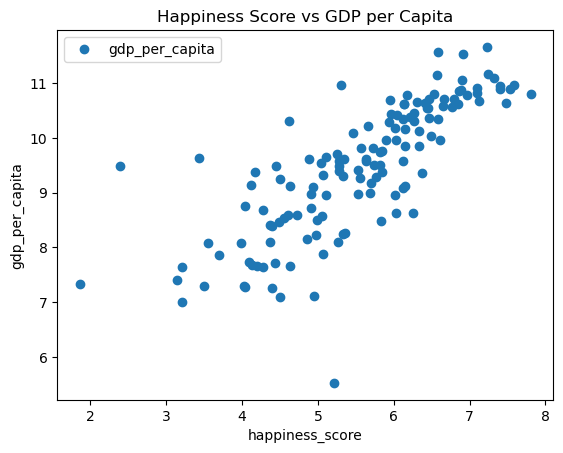

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

happy_df_2023.plot(x = 'happiness_score', y='gdp_per_capita',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness Score vs GDP per Capita')  
plt.xlabel('happiness_score')  
plt.ylabel('gdp_per_capita')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = happy_df_2023['happiness_score'].values.reshape(-1,1)
y = happy_df_2023['gdp_per_capita'].values.reshape(-1,1)

In [20]:
X

array([[7.804],
       [7.586],
       [7.53 ],
       [7.473],
       [7.403],
       [7.395],
       [7.315],
       [7.24 ],
       [7.228],
       [7.123],
       [7.097],
       [7.095],
       [6.961],
       [6.911],
       [6.894],
       [6.892],
       [6.859],
       [6.845],
       [6.796],
       [6.763],
       [6.661],
       [6.65 ],
       [6.609],
       [6.589],
       [6.587],
       [6.571],
       [6.535],
       [6.494],
       [6.469],
       [6.463],
       [6.455],
       [6.436],
       [6.405],
       [6.368],
       [6.334],
       [6.33 ],
       [6.3  ],
       [6.265],
       [6.26 ],
       [6.259],
       [6.213],
       [6.173],
       [6.15 ],
       [6.144],
       [6.144],
       [6.13 ],
       [6.129],
       [6.125],
       [6.125],
       [6.122],
       [6.041],
       [6.024],
       [6.023],
       [6.014],
       [6.012],
       [5.968],
       [5.951],
       [5.931],
       [5.902],
       [5.843],
       [5.84 ],
       [5.825],
       [

In [21]:
y

array([[10.792],
       [10.962],
       [10.896],
       [10.639],
       [10.942],
       [10.883],
       [11.088],
       [11.164],
       [11.66 ],
       [10.662],
       [10.899],
       [10.821],
       [10.773],
       [11.527],
       [11.048],
       [10.879],
       [10.844],
       [10.611],
       [10.704],
       [10.568],
       [10.701],
       [10.588],
       [ 9.952],
       [10.339],
       [11.571],
       [11.145],
       [10.797],
       [10.037],
       [10.353],
       [10.715],
       [10.541],
       [10.54 ],
       [10.634],
       [ 9.359],
       [10.114],
       [ 9.85 ],
       [10.661],
       [10.305],
       [10.453],
       [ 8.618],
       [10.37 ],
       [10.776],
       [ 9.116],
       [10.166],
       [ 9.854],
       [10.611],
       [10.616],
       [10.341],
       [ 9.582],
       [ 9.089],
       [10.419],
       [ 9.959],
       [ 8.635],
       [ 8.948],
       [10.169],
       [10.429],
       [10.693],
       [10.288],
       [ 9.957

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

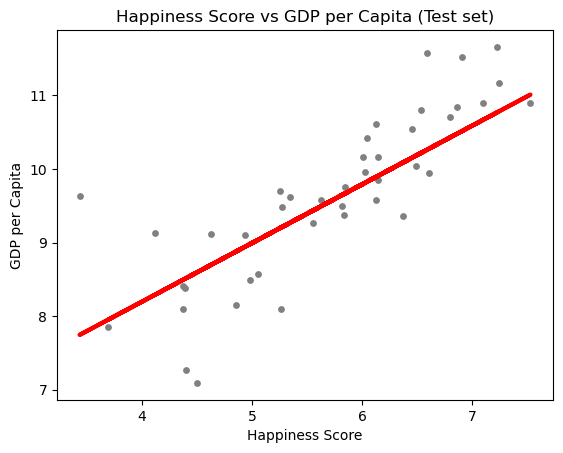

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs GDP per Capita (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('GDP per Capita')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.79810619]]
Mean squared error:  0.4180005898738378
R2 score:  0.6694092588010618


In [29]:
y_predicted

array([[10.21757417],
       [10.77066176],
       [ 9.19520013],
       [ 9.26543348],
       [ 9.90551465],
       [ 9.20557552],
       [10.27663402],
       [ 9.82330971],
       [ 9.89434116],
       [10.25907569],
       [ 9.66528468],
       [ 8.51122313],
       [ 9.80016463],
       [10.18485181],
       [ 9.64613013],
       [ 8.49286669],
       [ 8.5080307 ],
       [ 8.29014771],
       [ 8.69797998],
       [ 9.21196036],
       [ 9.66289036],
       [10.42587988],
       [ 9.03478079],
       [10.08429043],
       [ 8.97731714],
       [ 9.89035063],
       [10.78023903],
       [10.47616057],
       [ 7.95015447],
       [10.66610985],
       [11.01168983],
       [ 9.8097419 ],
       [ 8.87675576],
       [ 8.49127047],
       [10.15372567],
       [ 8.9453929 ],
       [ 9.43862252],
       [ 9.49528806],
       [ 9.90551465],
       [ 8.59422617],
       [ 7.74344497],
       [10.51766209]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,10.797,10.217574
1,11.660,10.770662
2,9.703,9.195200
3,9.615,9.265433
4,10.166,9.905515
5,8.095,9.205576
6,9.952,10.276634
7,10.419,9.823310
8,10.611,9.894341
9,11.571,10.259076


In [31]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.79810619]]
Mean squared error:  0.6210638279731154
R2 score:  0.5879761350446051


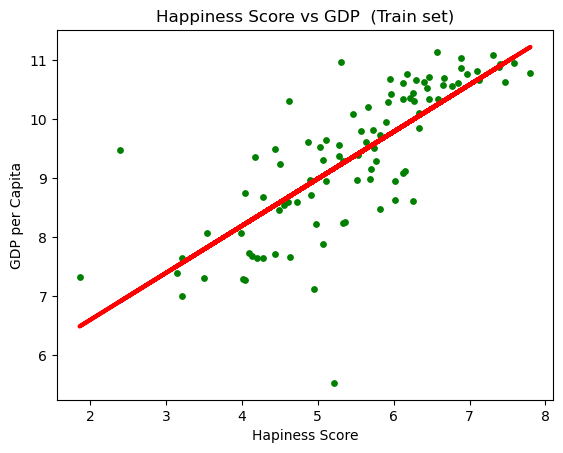

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Happiness Score vs GDP  (Train set)')
plot_test.xlabel('Hapiness Score')
plot_test.ylabel('GDP per Capita')
plot_test.show()

From the analysis and the strong positive correlation observed between GDP and Happiness Score, it can be inferred that the economic performance of a country, as measured by its Gross Domestic Product (GDP) per capita, is a significant predictor of the happiness of its citizens.

In practical terms, this suggests that countries with higher GDP per capita tend to report higher levels of happiness. The possible explanation for this could be that in countries with higher GDP per capita, citizens generally have better access to resources, opportunities, and services - including healthcare, education, and quality goods, which can contribute to overall well-being and satisfaction with life.